#Description: This program classifies images

In [27]:
#Import the libraries
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras import layers
from keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [28]:
#Load the data
from keras.datasets import cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [29]:
#Look at the data types of the variables
print(type(x_train))
print(type(y_train))
print(type(x_test))
print(type(y_test))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [30]:
#Get shape of the arrays
print('x_train shape:', x_train.shape)
print('y_train shape:', y_train.shape)
print('x_test shape:', x_test.shape)
print('y_test shape:', y_test.shape)

x_train shape: (50000, 32, 32, 3)
y_train shape: (50000, 1)
x_test shape: (10000, 32, 32, 3)
y_test shape: (10000, 1)


In [31]:
#Take a look at the first image as an array
index = 10
x_train[index]

array([[[53, 65, 53],
        [54, 63, 52],
        [56, 60, 50],
        ...,
        [47, 51, 50],
        [41, 45, 44],
        [24, 28, 27]],

       [[46, 59, 41],
        [53, 62, 45],
        [54, 59, 44],
        ...,
        [42, 46, 45],
        [39, 43, 42],
        [28, 32, 31]],

       [[45, 59, 38],
        [50, 60, 41],
        [46, 52, 34],
        ...,
        [38, 42, 41],
        [36, 40, 39],
        [29, 33, 32]],

       ...,

       [[71, 83, 66],
        [74, 83, 66],
        [80, 85, 67],
        ...,
        [51, 54, 33],
        [46, 49, 34],
        [49, 50, 41]],

       [[75, 82, 67],
        [79, 85, 69],
        [81, 85, 67],
        ...,
        [61, 65, 41],
        [64, 67, 48],
        [48, 50, 41]],

       [[85, 83, 71],
        [85, 84, 71],
        [86, 86, 70],
        ...,
        [61, 65, 39],
        [64, 67, 46],
        [49, 50, 41]]], dtype=uint8)

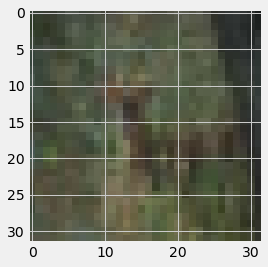

In [32]:
#Show image as a picture
img = plt.imshow(x_train[index])

In [33]:
#Get image label
print('The image label is:', y_train[index])

The image label is: [4]


In [34]:
#Get image classification key
classification = ['aeroplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']
#print the image class
print('The image class is:', classification[y_train[index][0]])

The image class is: deer


In [35]:
#Convert labels into a set of 10 numbers to input into the neural network
y_train_one_hot = to_categorical(y_train)
y_test_one_hot = to_categorical(y_test)

In [36]:
#Print the new labels
print(y_train_one_hot)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]]


In [37]:
#Print the new label of the image/picture above
print('The one hot label is:', y_train_one_hot[index])

The one hot label is: [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


In [38]:
#Normalise the pixels to be values between 0 and 1
x_train = x_train / 255
x_test = x_test / 255

In [39]:
x_train[index]

array([[[0.20784314, 0.25490196, 0.20784314],
        [0.21176471, 0.24705882, 0.20392157],
        [0.21960784, 0.23529412, 0.19607843],
        ...,
        [0.18431373, 0.2       , 0.19607843],
        [0.16078431, 0.17647059, 0.17254902],
        [0.09411765, 0.10980392, 0.10588235]],

       [[0.18039216, 0.23137255, 0.16078431],
        [0.20784314, 0.24313725, 0.17647059],
        [0.21176471, 0.23137255, 0.17254902],
        ...,
        [0.16470588, 0.18039216, 0.17647059],
        [0.15294118, 0.16862745, 0.16470588],
        [0.10980392, 0.1254902 , 0.12156863]],

       [[0.17647059, 0.23137255, 0.14901961],
        [0.19607843, 0.23529412, 0.16078431],
        [0.18039216, 0.20392157, 0.13333333],
        ...,
        [0.14901961, 0.16470588, 0.16078431],
        [0.14117647, 0.15686275, 0.15294118],
        [0.11372549, 0.12941176, 0.1254902 ]],

       ...,

       [[0.27843137, 0.3254902 , 0.25882353],
        [0.29019608, 0.3254902 , 0.25882353],
        [0.31372549, 0

In [41]:
#Create the models architecture
model = Sequential()

#Add the first layer
model.add(Conv2D(32,(5,5), activation='relu', input_shape=(32,32,3) ) )

#Add a pooling layer
model.add(MaxPooling2D(pool_size = (2,2)))

#Add a second convolution layer
model.add(Conv2D(32,(5,5), activation='relu') )

#Add a second pooling layer
model.add(MaxPooling2D(pool_size = (2,2)))

#Add a flattening layer
model.add(Flatten())

#Add a layer with 1000 neurons
model.add(Dense(1000, activation='relu'))

#Add a dropout layer with 50% dropout rate
model.add(Dropout(0.5))

#Add another layer with 500 neurons
model.add(Dense(500, activation='relu'))

#Add another dropout layer with 50% dropout rate
model.add(Dropout(0.5))

#Add another layer with 250 neurons
model.add(Dense(250, activation='relu'))

#Add another layer with 10 neurons
model.add(Dense(10, activation='softmax'))

In [43]:
#Compile the model
model.compile(loss = 'categorical_crossentropy',
              optimizer = 'adam',
              metrics = ['accuracy'])

In [44]:
#Train the model
hist = model.fit(x_train, 
                 y_train_one_hot, 
                 batch_size = 256, 
                 epochs = 10,
                 validation_split = 0.2)

Epoch 1/10
157/157 [==============================] - 31s 198ms/step - loss: 1.7659 - accuracy: 0.3373 - val_loss: 1.4916 - val_accuracy: 0.4444
Epoch 2/10
157/157 [==============================] - 29s 185ms/step - loss: 1.4047 - accuracy: 0.4832 - val_loss: 1.2629 - val_accuracy: 0.5410
Epoch 3/10
157/157 [==============================] - 29s 184ms/step - loss: 1.2640 - accuracy: 0.5429 - val_loss: 1.2302 - val_accuracy: 0.5628
Epoch 4/10
157/157 [==============================] - 31s 199ms/step - loss: 1.1526 - accuracy: 0.5870 - val_loss: 1.1234 - val_accuracy: 0.5991
Epoch 5/10
157/157 [==============================] - 30s 191ms/step - loss: 1.0786 - accuracy: 0.6142 - val_loss: 1.0621 - val_accuracy: 0.6240
Epoch 6/10
157/157 [==============================] - 28s 178ms/step - loss: 1.0056 - accuracy: 0.6434 - val_loss: 1.0254 - val_accuracy: 0.6405
Epoch 7/10
157/157 [==============================] - 28s 179ms/step - loss: 0.9463 - accuracy: 0.6654 - val_loss: 1.0081 - val_ac

In [45]:
#Evaluate the model using the test data set
model.evaluate(x_test, y_test_one_hot)[1]

313/313 [==============================] - 3s 10ms/step - loss: 0.9463 - accuracy: 0.6773


0.677299976348877

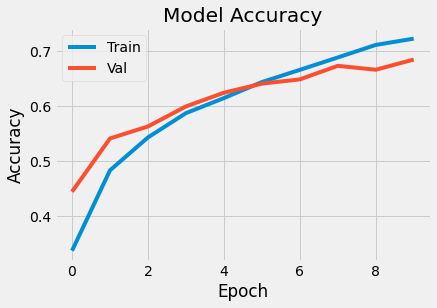

In [47]:
#Visualise the models accuracy
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

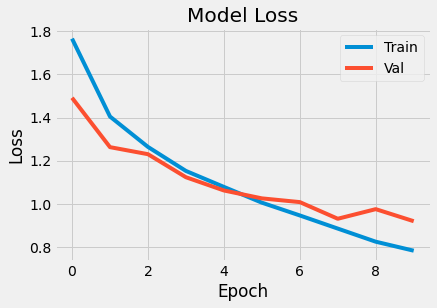

In [48]:
#Visualise the models loss
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

In [89]:
#Test the model with an example
#### USING PILLOW NOT GOOGLE-COLAB ##### Google-colab wont work
from PIL import Image
myImage = Image.open("dog2.jpg");
myImage.show()

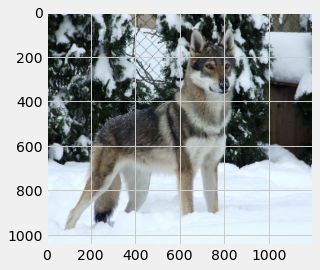

In [95]:
#show image
new_image = plt.imread('dog2.jpg')
img = plt.imshow(new_image)

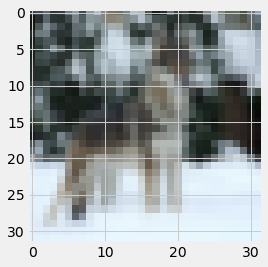

In [91]:
#resize the image
from skimage.transform import resize
resized_image = resize(new_image, (32,32,3))
img = plt.imshow(resized_image)

In [92]:
#Get the model prediction
predictions = model.predict(np.array([resized_image]))
#show the predictions
predictions

array([[0.00776415, 0.03720954, 0.02406044, 0.21375108, 0.1786634 ,
        0.08469573, 0.41440073, 0.0196885 , 0.00132549, 0.01844084]],
      dtype=float32)

In [93]:
#Sort the predictions from least to most
list_index = [0,1,2,3,4,5,6,7,8,9]
x = predictions

for i in range(10):
    for j in range(10):
        if x[0][list_index[i]] > x[0][list_index[j]]:
            temp = list_index[i]
            list_index[i] = list_index[j]
            list_index[j] = temp
            
#show the sorted labels
print(list_index)

[6, 3, 4, 5, 1, 2, 7, 9, 0, 8]


In [94]:
#print the first 5 most likely classes
for i in range(5):
    print(classification[list_index[i]], ':', round(predictions[0][list_index[i]]*100, 2), '%')

frog : 41.44 %
cat : 21.38 %
deer : 17.87 %
dog : 8.47 %
automobile : 3.72 %
